In [1]:
import pandas as pd
import numpy as np
import statistics 
import random

pd.set_option('display.max_columns', 22)
pd.set_option('display.max_rows', 88)

df = pd.read_excel("C1 - t1.xlsx")

a1 = df.reindex(columns=['访问时长(seconds)'])
a1 = a1.values
a2 = df.reindex(columns=['活动要求学习时间(seconds)'])
a2 = a2.values

a = a1 -a2
df['高过门槛时长'] = a


user = df['USER ID'].unique()
user = list(user)
len(user)

user.remove(24632) 
user.remove(24702) 

rf = pd.read_excel("C1 - t2.xlsx")
rf.set_index('USER ID', inplace=True)
rf = rf.reindex(user)

In [2]:
len(user)

52

In [3]:
rf

,完成进度,累计时间(hours),学习次数,Percentile,结业考试成绩
USER ID,,,,,
1625,1.00,9.68,70,0.981,27
24539,0.38,5.44,36,0.907,0
24581,0.97,2.09,62,0.352,30
24586,1.00,2.71,65,0.500,27
24585,1.00,2.52,79,0.444,18
8976,1.00,1.76,64,0.222,15
24603,1.00,2.71,69,0.519,15
24606,1.00,1.71,60,0.204,27
24589,0.97,1.62,57,0.130,27


In [4]:
activities = df['活动名称'].unique()
activities = list(activities)
activities

['课程前测',
 '学一学：人工智能应用示例（一）',
 '学一学：人工智能现状——第三次热潮',
 '补充资料：波士顿动力机器人',
 '第一讲 学习体验问卷',
 '解释型AI的决策应用调查表',
 '延伸阅读：人工智能的历史现状与未来（选修）',
 '第二讲 学习体验问卷',
 '学一学：人工智能现状：AI版“双手互搏”有多牛？',
 '第三讲 学习体验问卷',
 '学一学：人工智能应用示例（二）',
 '第四讲 学习体验问卷',
 '学一学：人工智能的突破与不确定性',
 '第五讲 学习体验问卷',
 '学一学：视觉错觉（一）视力之谜',
 '延伸阅读：颠倒的视觉',
 '第六讲 学习体验问卷',
 '学一学：视觉错觉（二）颜色错觉',
 '第七讲 学习体验问卷',
 '学一学：视觉错觉（三）先验错觉',
 '延伸阅读：看得见的斑点狗',
 '延伸阅读：火星人脸的阴影',
 '第八讲 学习体验问卷',
 '学一学：声音与视听错觉',
 '延伸阅读：听觉错觉与语音、歌唱的智能分析',
 '第九讲 学习体验问卷',
 '学一学：空间错觉  二维',
 '学一学：空间错觉  三维',
 '第十讲 学习体验问卷',
 '学一学：语言错觉',
 '第十一讲 学习体验问卷',
 '学一学：其他错觉',
 '学一学：思考与小结',
 '第十二讲 学习体验问卷',
 '想一想：课程回顾',
 '延伸阅读：我思故我在？（选修）',
 '第十三讲 学习体验问卷',
 '第十四讲 学习体验问卷',
 '课程整体回顾问卷',
 '测一测：人工智能与错觉，你明白了吗？']

In [5]:
USER_ID = {}
for i in user:
     USER_ID[i] = df.loc[df['USER ID'] == i]


c1 = np.array([196, 537, 170, 344, 399, 845, 381, 257, 354, 1027, 716, 676, 1007, 381, 139])
c2 = np.array([5, 5, 9, 20, 42])
c3 = np.array([53, 6, 3, 3, 3, 3, 3, 3, 3, 
               3, 3, 3, 3, 3, 3, 3, 3])
c4 = ['学一学：人工智能应用示例（一）',
    '学一学：人工智能现状——第三次热潮',
    '学一学：人工智能现状：AI版“双手互搏”有多牛？',
    '学一学：人工智能应用示例（二）', 
    '学一学：人工智能的突破与不确定性',
    '学一学：视觉错觉（一）视力之谜',
    '学一学：视觉错觉（二）颜色错觉',
    '学一学：视觉错觉（三）先验错觉',
    '学一学：声音与视听错觉', 
    '学一学：空间错觉  二维',
    '学一学：空间错觉  三维',
    '学一学：语言错觉',
    '学一学：其他错觉',
    '学一学：思考与小结',
    '补充资料：波士顿动力机器人']
c5 = ['延伸阅读：颠倒的视觉', 
    '延伸阅读：看得见的斑点狗',
    '延伸阅读：火星人脸的阴影', 
    '延伸阅读：听觉错觉与语音、歌唱的智能分析', 
    '想一想：课程回顾']
c6 = ['课程前测', 
    '解释型AI的决策应用调查表', 
    '第一讲 学习体验问卷',
    '第二讲 学习体验问卷',
    '第三讲 学习体验问卷',
    '第四讲 学习体验问卷',
    '第五讲 学习体验问卷',
    '第六讲 学习体验问卷',
    '第七讲 学习体验问卷',
    '第八讲 学习体验问卷',
    '第九讲 学习体验问卷',
    '第十讲 学习体验问卷',
    '第十一讲 学习体验问卷',
    '第十二讲 学习体验问卷',
    '第十三讲 学习体验问卷',
    '第十四讲 学习体验问卷',
    '课程整体回顾问卷']

In [6]:
len(user)

52

In [7]:
import scipy.stats as ss

C2_dictionary = {}
duplicate = {'访问时长(seconds)':'sum', '高过门槛时长':'sum'}

for k , i in zip(range(52), user): 
    C2_dictionary["LEARNER{0}".format(i)] = []
    
    USER_ID[i].reset_index(inplace=True)
    USER_ID[i].set_index('活动名称', inplace=True)
    
    USER_ID[i] = USER_ID[i].groupby('活动名称').agg(duplicate).reindex(columns=['访问时长(seconds)', '高过门槛时长'])

    Time_V = USER_ID[i].reindex(c4, columns =['访问时长(seconds)']).values    #视频观看时长
    Time_V = list(np.nan_to_num(Time_V).flatten())
    
    Time_T = USER_ID[i].reindex(c5, columns =['访问时长(seconds)']).values    #文本阅读时长
    Time_T = list(np.nan_to_num(Time_T).flatten())

    Time_H = USER_ID[i].reindex(c6, columns =['访问时长(seconds)']).values    #作业花费时长
    Time_H = list(np.nan_to_num(Time_H).flatten())
    
    Grit_V = Time_V / c1  #视频观看时长/视频总时长
    Grit_T = Time_T / c2   #文本阅读时长/文本页数
    Grit_H = Time_H / c3   #作业花费时长/作业问题数
    Grit1 = ss.tmean(Grit_V)    #(视频观看时长/视频总时长)的平均
    Grit2 = np.median(Grit_V)    #(视频观看时长/视频总时长)的中位数
    Grit3 = 1/ss.tstd(Grit_V)    #(视频观看时长/视频总时长)的标准差的倒数
    Grit4 = 1/(max(Grit_V)-min(Grit_V))    #(视频观看时长/视频总时长)最大差距的倒数
    Grit5 = ss.tmean(Grit_T)    #(文本阅读时长/文本页数)的平均
    Grit6 = np.median(Grit_T)    #(文本阅读时长/文本页数)的中位数
    Grit7 = 1/ss.tstd(Grit_T)    #(文本阅读时长/文本页数)的标准差的倒数
    Grit8 = 1/(max(Grit_T)-min(Grit_T))    #(文本阅读时长/文本页数)最大差距的倒数
    Grit9 = ss.tmean(Grit_H)    #(作业花费时长/作业问题数)的平均
    Grit10 = np.median(Grit_H)    #(作业花费时长/作业问题数)的中位数
    Grit11 = 1/ss.tstd(Grit_H)    #(作业花费时长/作业问题数)的标准差的倒数
    Grit12 = 1/(max(Grit_H)-min(Grit_H))    #(作业花费时长/作业问题数)最大差距的倒数

    Self_control1 = Time_V[1] / 1027    #("最长视频"观看时长/视频总时长)
    Self_control2 = Time_T[0] / 42    #("最多页文本"阅读时长/文本页数)
    Self_control3 = Time_H[0] / 53    #("最多题作业"花费时长/作业问题数)

    Self_control4 = USER_ID[i].reindex(columns =['访问时长(seconds)']).values    #单一课件一次学习最长时长
    Self_control4 = np.nan_to_num(Self_control4)
    Self_control4 = Self_control4.max()

    Self_control5 = USER_ID[i].reindex(columns = ['访问时长(seconds)']).values    #单一课件一次学习最短时长 
    Self_control5 = np.nan_to_num(Self_control5)
    Self_control5 = Self_control5.min()

    Self_control6 = USER_ID[i].reindex(columns = ['访问时长(seconds)']).values    #平均登入時長
    Self_control6 = np.nan_to_num(Self_control6)
    Self_control6 = Self_control6.sum() 
    LOGIN = rf.iloc[k, 2]
    Self_control6 = Self_control6 / LOGIN

    Self_control7 = USER_ID[i].reindex(columns =['访问时长(seconds)']).values    #课程后半段学习时间
    Self_control7 = np.nan_to_num(Self_control7)
    Self_control7 = Self_control7[14:].mean()

    Engagement_V = Time_V    #视频观看时长
    Engagement_T = Time_T    #文本阅读时长
    Engagement_H = Time_H    #作业花费时长

    Engagement1 = USER_ID[i].reindex(columns =['访问时长(seconds)'])    #学习总时长
    Engagement1 = np.nan_to_num(Engagement1).sum()
    Engagement2 = ss.tmean(Engagement_V)    #平均每次花费在视频学习的时间
    Engagement3 = ss.tmean(Engagement_T)    #平均每次花费在文本课件的时间
    Engagement4 = ss.tmean(Engagement_H)    #平均每次花费在作业答题的时间
    Engagement5 = LOGIN    #学习次数(登入次数)
    Engagement6 = rf.iloc[k, 4]    #结业考试成绩(30%)*

    Metacognitive_Self_regulation1 = Time_T[1]    #"课程回顾"花费时间
    Metacognitive_Self_regulation2 = random.randint(0, 1)    #是否重复阅读与观看 or 是否按照课程结构

    Self_perception1 = USER_ID[i].reindex(columns =['访问时长(seconds)']).values
    Self_perception1 = np.nan_to_num(Self_perception1)

    Self_perception1 = 1/((Self_perception1[:14].sum() 
                         - Self_perception1[14:].sum())**2)    
    #(学习历程前半段时长-学习历程后半段时长)的平方的倒数
    
    Self_perception2 = 1/((ss.tmean(Grit_V[:10]) 
                         - ss.tmean(Grit_V[10:]))**2)    
    #((视频观看时长/视频时长)前半段平均-(视频观看时长/视频时长)后半段平均)的平方的倒数
    
    Self_perception3 = 1/((Grit_T[0] - Grit_T[1])**2)    
    #((文本阅读时长/页数)前半段平均-(文本阅读时长/页数)后半段平均)的平方的倒数    
    
    Self_perception4 = 1/((Grit_H[0] - Grit_H[1])**2)    
    #((作业花费时长/页数)前半段平均-(作业花费时长/页数)后半段平均)的平方的倒数 


    Motivation1 = USER_ID[i].reindex(columns =['高过门槛时长']).values
    Motivation1 = np.nan_to_num(Motivation1).sum()    #高过门槛时长总和

    Motivation2 = USER_ID[i].reindex(c4, columns =['高过门槛时长']).values
    Motivation2 = np.nan_to_num(Motivation2).sum()

    Motivation3 = USER_ID[i].reindex(c5, columns =['高过门槛时长']).values   
    Motivation3 = np.nan_to_num(Motivation3).sum()
                                       
    Motivation4 = np.array(USER_ID[i].reindex(c4, columns =['高过门槛时长']).values).flatten()
    Motivation4 = np.nan_to_num(Motivation4)
    Motivation4 = ss.tmean(Motivation4 / c1)

    Motivation5 = np.array(USER_ID[i].reindex(c5, columns =['高过门槛时长']).values).flatten()
    Motivation5 = np.nan_to_num(Motivation5)
    Motivation5 = ss.tmean(Motivation5 / c2)

    Motivation6 = np.array(USER_ID[i].reindex(['延伸阅读：人工智能的历史现状与未来（选修）', '延伸阅读：我思故我在？（选修）'], columns = ['访问时长(seconds)']).values).flatten()
    Motivation6 = np.nan_to_num(Motivation6).sum()

    Motivation7 = Motivation6 / (11+8)
    Motivation8 = Motivation7/Motivation5    #(选修花费/页数)的平均 / (文挡高过门槛时长/页数)的平均
    Motivation9 = rf.iloc[k, 0]    #完成进度*
    
    C2_dictionary["LEARNER{0}".format(i)].append([Grit1, 
                                             Grit2,
                                             Grit3,
                                             Grit4,
                                             Grit5,
                                             Grit6,
                                             Grit7,
                                             Grit8,
                                             Grit9,
                                             Grit10,
                                             Grit11,
                                             Grit12,
                                             Self_control1,
                                             Self_control2,
                                             Self_control3,
                                             Self_control4,
                                             Self_control5,
                                             Self_control6,
                                             Self_control7,
                                             Engagement1,
                                             Engagement2,
                                             Engagement3,
                                             Engagement4,
                                             Engagement5,
                                             Engagement6,
                                             Metacognitive_Self_regulation1,
                                             Metacognitive_Self_regulation2,
                                             Self_perception1,
                                             Self_perception2,
                                             Self_perception3,
                                             Self_perception4,
                                             Motivation1,
                                             Motivation2,
                                             Motivation3,
                                             Motivation4,
                                             Motivation5,
                                             Motivation6,
                                             Motivation7,
                                             Motivation8,
                                             Motivation9])


C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:87: RuntimeWarning: divide by zero encountered in double_scalars


In [8]:
C2_dictionary.items()

dict_items([('LEARNER1625', [[2.898087228392211, 1.8724489795918366, 0.4889971204992203, 0.16459992311494315, 57.01698412698412, 36.8, 0.016772462425568947, 0.006755488834678176, 6.054199038105808, 4.666666666666667, 0.2178870206438213, 0.06185567010309279, 0.5530671859785784, 8.261904761904763, 15.754716981132075, 9393, 8, 497.75714285714287, 534.0384615384615, 34843, 1407.4, 557.6, 67.82352941176471, 70, 27, 184, 0, 1.99890743717299e-08, 3.170905339650143, 0.0009409462155143208, 0.10550884196314646, 29983, 17091, 2188, 2.3416899176495236, 42.97888888888889, 9723, 511.7368421052632, 11.906702461020576, 1.0]]), ('LEARNER24539', [[3.0747677603443933, 1.3813229571984436, 0.1525158412507871, 0.0375407010151312, 8.647619047619049, 0.0, 0.051715228554510544, 0.023127753303964757, 9.062708102108768, 0.0, 0.03702881123901191, 0.009852216748768473, 0.8851022395326192, 0.0, 52.56603773584906, 5221, 355, 544.3888888888889, 1737.0, 19598, 959.1333333333333, 363.2, 199.7058823529412, 36, 0, 0.0, 1

In [9]:
column_names = ['G1', 
                'G2', 
                'G3', 
                'G4', 
                'G5', 
                'G6', 
                'G7', 
                'G8', 
                'G9', 
                'G10', 
                'G11', 
                'G12', 
                'SC1', 
                'SC2', 
                'SC3', 
                'SC4', 
                'SC5', 
                'SC6', 
                'SC7', 
                'E1', 
                'E2', 
                'E3', 
                'E4', 
                'E5', 
                'E6', 
                'MSR1', 
                'MSR2', 
                'SP1', 
                'SP2', 
                'SP3', 
                'SP4', 
                'M1', 
                'M2', 
                'M3', 
                'M4', 
                'M5',
                'M6', 
                'M7', 
                'M8', 
                'M9']


df_Data_Point = pd.DataFrame(columns = column_names)

In [10]:
for i in user:
    a_series = pd.Series(C2_dictionary['LEARNER' + str(i)][0], index = df_Data_Point.columns)
    df_Data_Point = df_Data_Point.append(a_series, ignore_index=True)

In [11]:
df_Data_Point.head()

,G1,G2,G3,G4,G5,G6,G7,G8,G9,G10,G11,...,SP3,SP4,M1,M2,M3,M4,M5,M6,M7,M8,M9
0,2.898087,1.872449,0.488997,0.164600,57.016984,36.800000,0.016772,0.006755,6.054199,4.666667,0.217887,...,0.000941,0.105509,29983.0,17091.0,2188.0,2.341690,42.978889,9723.0,511.736842,11.906702,1.00
1,3.074768,1.381323,0.152516,0.037541,8.647619,0.000000,0.051715,0.023128,9.062708,0.000000,0.037029,...,inf,0.000418,15518.0,10427.0,1696.0,2.547147,8.076190,0.0,0.000000,0.000000,0.38
2,0.768032,0.748603,3.558609,0.922541,35.882698,27.400000,0.029752,0.013669,4.381428,4.000000,0.658921,...,0.000671,0.453911,2772.0,1416.0,815.0,0.211635,21.844603,138.0,7.263158,0.332492,0.97
3,1.114045,1.064972,3.038088,0.643289,20.044127,24.444444,0.073477,0.035182,5.268775,4.666667,0.329036,...,0.206612,0.406119,4884.0,3995.0,276.0,0.557647,6.006032,233.0,12.263158,2.041807,1.00
4,1.024841,1.050633,5.324818,1.456641,17.407143,20.666667,0.086966,0.038638,7.408805,6.666667,0.194214,...,0.173611,0.011357,4208.0,3247.0,148.0,0.468444,3.369048,305.0,16.052632,4.764739,1.00


In [12]:
df_Data_Point.head()

,G1,G2,G3,G4,G5,G6,G7,G8,G9,G10,G11,...,SP3,SP4,M1,M2,M3,M4,M5,M6,M7,M8,M9
0,2.898087,1.872449,0.488997,0.164600,57.016984,36.800000,0.016772,0.006755,6.054199,4.666667,0.217887,...,0.000941,0.105509,29983.0,17091.0,2188.0,2.341690,42.978889,9723.0,511.736842,11.906702,1.00
1,3.074768,1.381323,0.152516,0.037541,8.647619,0.000000,0.051715,0.023128,9.062708,0.000000,0.037029,...,inf,0.000418,15518.0,10427.0,1696.0,2.547147,8.076190,0.0,0.000000,0.000000,0.38
2,0.768032,0.748603,3.558609,0.922541,35.882698,27.400000,0.029752,0.013669,4.381428,4.000000,0.658921,...,0.000671,0.453911,2772.0,1416.0,815.0,0.211635,21.844603,138.0,7.263158,0.332492,0.97
3,1.114045,1.064972,3.038088,0.643289,20.044127,24.444444,0.073477,0.035182,5.268775,4.666667,0.329036,...,0.206612,0.406119,4884.0,3995.0,276.0,0.557647,6.006032,233.0,12.263158,2.041807,1.00
4,1.024841,1.050633,5.324818,1.456641,17.407143,20.666667,0.086966,0.038638,7.408805,6.666667,0.194214,...,0.173611,0.011357,4208.0,3247.0,148.0,0.468444,3.369048,305.0,16.052632,4.764739,1.00


In [13]:
df_Data_Point['USER_ID'] = user
df_Data_Point.set_index('USER_ID', inplace=True)

In [14]:
df_Data_Point

,G1,G2,G3,G4,G5,G6,G7,G8,G9,G10,G11,...,SP3,SP4,M1,M2,M3,M4,M5,M6,M7,M8,M9
USER_ID,,,,,,,,,,,,,,,,,,,,,,,
1625,2.898087,1.872449,0.488997,0.164600,57.016984,36.800000,0.016772,0.006755,6.054199,4.666667,0.217887,...,9.409462e-04,0.105509,29983.0,17091.0,2188.0,2.341690,42.978889,9723.0,511.736842,11.906702,1.00
24539,3.074768,1.381323,0.152516,0.037541,8.647619,0.000000,0.051715,0.023128,9.062708,0.000000,0.037029,...,inf,0.000418,15518.0,10427.0,1696.0,2.547147,8.076190,0.0,0.000000,0.000000,0.38
24581,0.768032,0.748603,3.558609,0.922541,35.882698,27.400000,0.029752,0.013669,4.381428,4.000000,0.658921,...,6.711590e-04,0.453911,2772.0,1416.0,815.0,0.211635,21.844603,138.0,7.263158,0.332492,0.97
24586,1.114045,1.064972,3.038088,0.643289,20.044127,24.444444,0.073477,0.035182,5.268775,4.666667,0.329036,...,2.066116e-01,0.406119,4884.0,3995.0,276.0,0.557647,6.006032,233.0,12.263158,2.041807,1.00
24585,1.024841,1.050633,5.324818,1.456641,17.407143,20.666667,0.086966,0.038638,7.408805,6.666667,0.194214,...,1.736111e-01,0.011357,4208.0,3247.0,148.0,0.468444,3.369048,305.0,16.052632,4.764739,1.00
8976,0.712962,0.779070,3.022446,0.985683,14.587778,13.888889,0.099713,0.045872,6.238439,4.000000,0.200233,...,2.500000e+01,0.046989,1466.0,779.0,31.0,0.156565,0.549683,178.0,9.368421,17.043330,1.00
24603,1.006295,0.981627,2.529300,0.818623,36.393492,40.200000,0.032435,0.013285,8.288383,6.333333,0.207582,...,6.925208e-04,0.008952,4895.0,2318.0,768.0,0.449898,22.355397,296.0,15.578947,0.696876,1.00
24606,0.669778,0.648294,7.444947,1.943135,15.894127,15.444444,0.091370,0.041975,6.028857,4.333333,0.233026,...,3.086420e-01,0.123742,1287.0,820.0,100.0,0.113380,1.856032,187.0,9.842105,5.302768,1.00
24589,0.650936,0.585799,5.224177,1.266727,15.867778,14.555556,0.096550,0.045317,4.466889,3.666667,0.357719,...,3.086420e-01,0.071893,1109.0,575.0,149.0,0.094538,1.829683,128.0,6.736842,3.681973,0.97


In [15]:
df_Data_Point.describe()

,G1,G2,G3,G4,G5,G6,G7,G8,G9,G10,G11,...,SP3,SP4,M1,M2,M3,M4,M5,M6,M7,M8,M9
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,...,5.200000e+01,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,1.327751,1.003383,2.691319,0.733478,29.857430,20.177778,0.063312,0.027382,11.434265,7.256652,0.177619,...,inf,0.747788,7106.826923,4856.230769,614.903846,0.786704,16.469518,440.865385,23.203441,3.302402,0.963846
std,0.750782,0.366443,2.297706,0.627781,45.784894,9.845994,0.030764,0.013775,7.386990,3.538420,0.116415,...,NaN,3.054641,6651.649973,4850.384705,1259.812486,0.761506,45.651512,1358.228460,71.485708,6.819695,0.102539
min,0.362708,0.346457,0.152516,0.037541,8.647619,0.000000,0.001550,0.000677,4.319090,0.000000,0.005781,...,5.797036e-07,0.000008,-325.000000,-1789.000000,-152.000000,-0.193689,-2.811746,0.000000,0.000000,-27.687176,0.380000
25%,0.698849,0.646982,0.785661,0.210587,15.887540,14.222222,0.041034,0.017316,6.642203,4.333333,0.106026,...,1.152152e-03,0.010475,1672.250000,809.750000,100.000000,0.154768,2.199246,144.750000,7.618421,0.593639,0.970000
50%,1.081762,0.977182,1.833309,0.615153,18.814841,15.111111,0.057998,0.025530,9.869312,6.000000,0.139570,...,1.236398e-02,0.033627,4889.500000,3481.000000,247.500000,0.535928,6.769683,183.500000,9.657895,1.653035,1.000000
75%,1.846548,1.349717,4.483733,1.136894,30.719802,25.650000,0.091588,0.041169,14.486265,11.416667,0.221391,...,2.646605e-01,0.147590,11537.250000,8717.750000,636.250000,1.329495,17.110278,235.500000,12.394737,4.899246,1.000000
max,3.851710,1.872449,8.288808,2.392675,340.537619,42.000000,0.123196,0.051151,51.200518,13.666667,0.658921,...,inf,21.240076,29983.000000,22409.000000,8559.000000,3.408560,326.499524,9723.000000,511.736842,28.533914,1.000000


In [16]:
df_Data_Point.replace(np.inf, 0, inplace=True)

In [17]:
# Normalization of Features
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler() 
df_Data_Point_scaled = scaler.fit_transform(df_Data_Point) # it becomes an array
df_Data_Point_scaled_noNaN = np.nan_to_num(df_Data_Point_scaled)

# make it a dataframe
df_Data_Point_scaled_noNaN = pd.DataFrame(df_Data_Point_scaled_noNaN, index = df_Data_Point.index, 
                                          columns = df_Data_Point.columns)

In [18]:
df_Data_Point_scaled_noNaN

,G1,G2,G3,G4,G5,G6,G7,G8,G9,G10,G11,...,SP3,SP4,M1,M2,M3,M4,M5,M6,M7,M8,M9
USER_ID,,,,,,,,,,,,,,,,,,,,,,,
1625,0.726677,1.000000,0.041356,0.053950,0.145739,0.876190,0.125137,0.120432,0.037011,0.341463,0.324749,...,3.763785e-05,0.004967,1.000000,0.780230,0.268626,0.703832,0.139050,1.000000,1.000000,0.704253,1.000000
24539,0.777317,0.678160,0.000000,0.000000,0.000000,0.000000,0.412388,0.444802,0.101183,0.000000,0.047843,...,0.000000e+00,0.000019,0.522733,0.504835,0.212146,0.760868,0.033063,0.000000,0.000000,0.492470,0.000000
24581,0.116172,0.263531,0.418630,0.375775,0.082061,0.652381,0.231837,0.257402,0.001330,0.292683,1.000000,...,2.684636e-05,0.021370,0.102184,0.132449,0.111009,0.112520,0.074872,0.014193,0.014193,0.498384,0.951613
24586,0.215344,0.470851,0.354654,0.257203,0.034338,0.582011,0.591282,0.683617,0.020257,0.341463,0.494926,...,8.264463e-03,0.019120,0.171869,0.239028,0.049133,0.208574,0.026776,0.023964,0.023964,0.528787,1.000000
24585,0.189777,0.461455,0.635708,0.602556,0.026393,0.492063,0.702175,0.752102,0.065905,0.487805,0.288504,...,6.944444e-03,0.000534,0.149564,0.208116,0.034439,0.183811,0.018769,0.031369,0.031369,0.577220,1.000000
8976,0.100388,0.283496,0.352732,0.402586,0.017898,0.330688,0.806957,0.895405,0.040940,0.292683,0.297719,...,1.000000e+00,0.002212,0.059093,0.106124,0.021008,0.097232,0.010207,0.018307,0.018307,0.795618,1.000000
24603,0.184462,0.416234,0.292121,0.331651,0.083600,0.957143,0.253893,0.249801,0.084667,0.463415,0.308970,...,2.770083e-05,0.000421,0.172232,0.169725,0.105614,0.178663,0.076424,0.030443,0.030443,0.504865,1.000000
24606,0.088011,0.197797,0.896284,0.809123,0.021834,0.367725,0.738376,0.818202,0.036470,0.317073,0.347927,...,1.234568e-02,0.005826,0.053187,0.107819,0.028929,0.085244,0.014174,0.019233,0.019233,0.586789,1.000000
24589,0.082610,0.156844,0.623338,0.521918,0.021755,0.346561,0.780955,0.884422,0.003153,0.268293,0.538841,...,1.234568e-02,0.003384,0.047314,0.097694,0.034554,0.080013,0.014094,0.013165,0.013165,0.557961,0.951613


In [19]:
df_Data_Point_scaled_noNaN.describe()

,G1,G2,G3,G4,G5,G6,G7,G8,G9,G10,G11,...,SP3,SP4,M1,M2,M3,M4,M5,M6,M7,M8,M9
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,...,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,0.276596,0.430491,0.312034,0.295498,0.063906,0.480423,0.507721,0.529089,0.151770,0.530975,0.263096,...,0.032615,0.035206,0.245210,0.274619,0.088039,0.272162,0.058550,0.045343,0.045343,0.551209,0.941687
std,0.215185,0.240134,0.282402,0.266559,0.137952,0.234428,0.252897,0.272915,0.157568,0.258909,0.178239,...,0.145216,0.143815,0.219468,0.200446,0.144623,0.211397,0.138627,0.139692,0.139692,0.121301,0.165386
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.096343,0.196937,0.077817,0.073476,0.021814,0.338624,0.324582,0.329666,0.049553,0.317073,0.153483,...,0.000024,0.000493,0.065898,0.107395,0.028929,0.096733,0.015217,0.014887,0.014887,0.503029,0.951613
50%,0.206092,0.413321,0.206580,0.245257,0.030634,0.359788,0.464040,0.492402,0.118389,0.439024,0.204841,...,0.000434,0.001583,0.172050,0.217787,0.045862,0.202545,0.029095,0.018873,0.018873,0.521872,1.000000
75%,0.425291,0.657448,0.532333,0.466790,0.066505,0.610714,0.740165,0.802241,0.216870,0.835366,0.330113,...,0.006174,0.006948,0.391390,0.434199,0.090489,0.422842,0.060496,0.024221,0.024221,0.579612,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

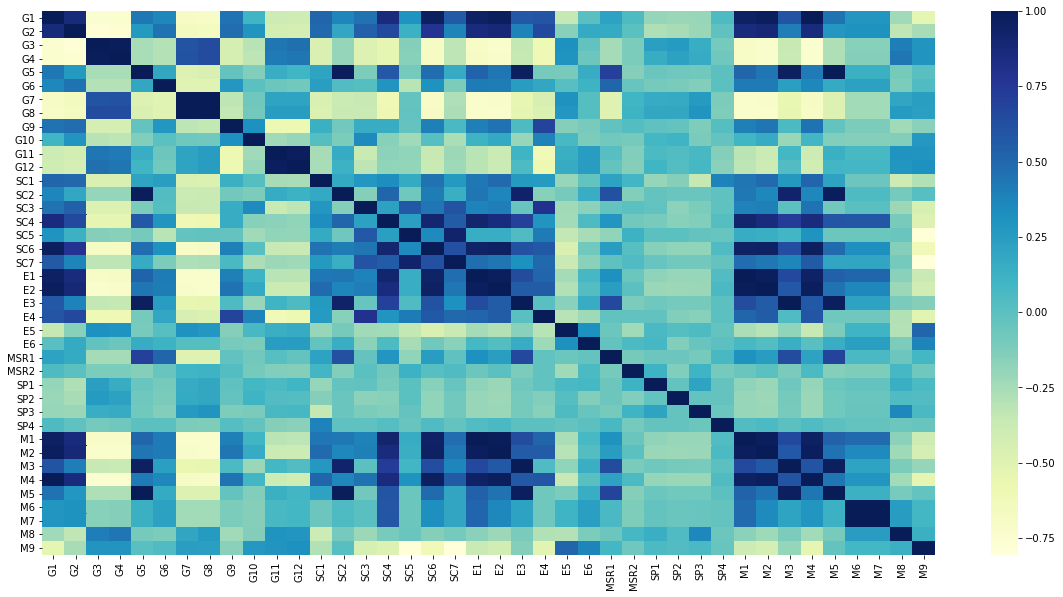

In [20]:
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,10))
e = df_Data_Point_scaled_noNaN.corr()
sns.heatmap(e, cmap="YlGnBu")

In [21]:
from __future__ import print_function
import sys
import numpy
numpy.set_printoptions(linewidth=1000)
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Do the PCA.

n=5
pca = PCA(n_components=n)
pct = pca.fit_transform(df_Data_Point_scaled_noNaN)

# Append the principle components for each entry to the dataframe
for i in range(n):
    df_Data_Point_scaled_noNaN['PC' + str(i + 1)] = pct[:, i]

display(df_Data_Point_scaled_noNaN.head())

,G1,G2,G3,G4,G5,G6,G7,G8,G9,G10,G11,...,M4,M5,M6,M7,M8,M9,PC1,PC2,PC3,PC4,PC5
USER_ID,,,,,,,,,,,,,,,,,,,,,,,
1625,0.726677,1.000000,0.041356,0.053950,0.145739,0.876190,0.125137,0.120432,0.037011,0.341463,0.324749,...,0.703832,0.139050,1.000000,1.000000,0.704253,1.000000,1.805611,0.784137,0.833630,-0.022941,0.813416
24539,0.777317,0.678160,0.000000,0.000000,0.000000,0.000000,0.412388,0.444802,0.101183,0.000000,0.047843,...,0.760868,0.033063,0.000000,0.000000,0.492470,0.000000,1.413988,-0.766002,-0.752945,1.365833,0.966761
24581,0.116172,0.263531,0.418630,0.375775,0.082061,0.652381,0.231837,0.257402,0.001330,0.292683,1.000000,...,0.112520,0.074872,0.014193,0.014193,0.498384,0.951613,-0.420357,0.746291,0.667568,-0.187883,-0.095031
24586,0.215344,0.470851,0.354654,0.257203,0.034338,0.582011,0.591282,0.683617,0.020257,0.341463,0.494926,...,0.208574,0.026776,0.023964,0.023964,0.528787,1.000000,-0.232931,-0.402829,0.533471,-0.199852,0.012662
24585,0.189777,0.461455,0.635708,0.602556,0.026393,0.492063,0.702175,0.752102,0.065905,0.487805,0.288504,...,0.183811,0.018769,0.031369,0.031369,0.577220,1.000000,-0.569005,-0.371397,0.284734,-0.017893,0.045414


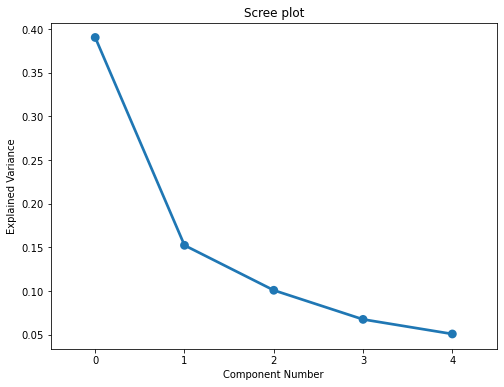

In [22]:
# Do a scree plot
ind = np.arange(n)
(fig, ax) = plt.subplots(figsize=(8, 6))
sns.pointplot(x=ind, y=pca.explained_variance_ratio_)
ax.set_title('Scree plot')
ax.set_xlabel('Component Number')
ax.set_ylabel('Explained Variance')
plt.show()

In [23]:
check_loadings_pca = pca.components_
check_eigenValues_pca = pca.explained_variance_ratio_
df_Data_Point_scaled_noNaN_check_pca = df_Data_Point_scaled_noNaN.reindex(columns=column_names)

In [24]:
num_pc = 5
check_pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
check_loadings_df = pd.DataFrame.from_dict(dict(zip(check_pc_list, check_loadings_pca)))
check_loadings_df['variable'] = df_Data_Point_scaled_noNaN_check_pca.columns.values
check_loadings_df = check_loadings_df.set_index('variable')
check_loadings_df

,PC1,PC2,PC3,PC4,PC5
variable,,,,,
G1,0.248302,-0.024533,0.017664,0.062579,0.111841
G2,0.259380,-0.015161,-0.026424,-0.190291,0.119058
G3,-0.284095,0.094940,0.096271,0.192098,0.050862
G4,-0.266408,0.088035,0.081413,0.203800,0.045605
G5,0.077336,0.076369,0.186477,0.086304,-0.120244
G6,0.124821,0.046545,0.120081,-0.162542,-0.293863
G7,-0.247322,-0.075019,-0.058450,-0.011560,0.296054
G8,-0.271667,-0.082506,-0.046328,0.015935,0.319995
G9,0.089462,-0.033731,-0.139654,-0.104840,-0.038117


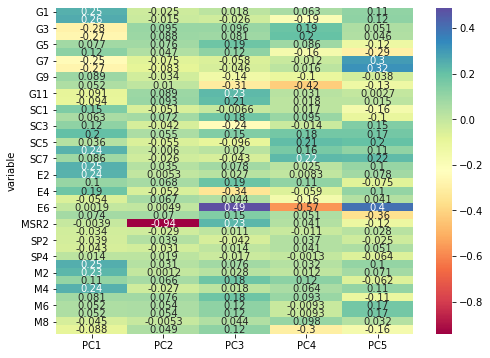

In [25]:
fig, ax = plt.subplots(figsize=(8, 6))
ax = sns.heatmap(check_loadings_df, annot=True, cmap='Spectral')
plt.show()

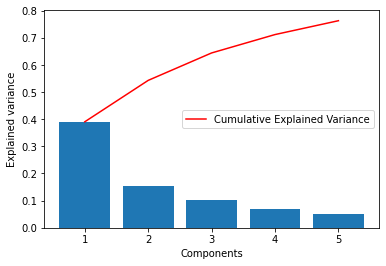

In [26]:
plt.bar(range(1, len(check_eigenValues_pca)+1), check_eigenValues_pca)
plt.ylabel('Explained variance')
plt.xlabel('Components')
plt.plot(range(1,len(check_eigenValues_pca)+1),
         np.cumsum(check_eigenValues_pca),
         c='red',
         label="Cumulative Explained Variance")
plt.legend(loc='center right')

C:\Users\user\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\user\Anaconda3\lib\site-packages\seaborn\regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


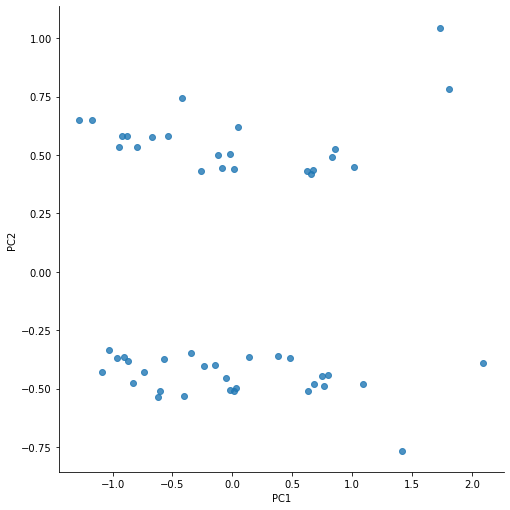

In [27]:
g = sns.lmplot('PC1',
               'PC2',
               data=df_Data_Point_scaled_noNaN,
               fit_reg=False,
               scatter=True,
               size=7)

plt.show()

In [28]:
df_Data_Point_scaled_noNaN = df_Data_Point_scaled_noNaN.drop(columns =['PC3', 'PC4', 'PC5']) 

In [29]:
df_Data_Point_scaled_noNaN_0 = df_Data_Point_scaled_noNaN.drop(columns =['PC1', 'PC2'], inplace = False) 
df_Data_Point_scaled_noNaN_0.head()
df_Data_Point_scaled_noNaN.head()

,G1,G2,G3,G4,G5,G6,G7,G8,G9,G10,G11,...,M1,M2,M3,M4,M5,M6,M7,M8,M9,PC1,PC2
USER_ID,,,,,,,,,,,,,,,,,,,,,,,
1625,0.726677,1.000000,0.041356,0.053950,0.145739,0.876190,0.125137,0.120432,0.037011,0.341463,0.324749,...,1.000000,0.780230,0.268626,0.703832,0.139050,1.000000,1.000000,0.704253,1.000000,1.805611,0.784137
24539,0.777317,0.678160,0.000000,0.000000,0.000000,0.000000,0.412388,0.444802,0.101183,0.000000,0.047843,...,0.522733,0.504835,0.212146,0.760868,0.033063,0.000000,0.000000,0.492470,0.000000,1.413988,-0.766002
24581,0.116172,0.263531,0.418630,0.375775,0.082061,0.652381,0.231837,0.257402,0.001330,0.292683,1.000000,...,0.102184,0.132449,0.111009,0.112520,0.074872,0.014193,0.014193,0.498384,0.951613,-0.420357,0.746291
24586,0.215344,0.470851,0.354654,0.257203,0.034338,0.582011,0.591282,0.683617,0.020257,0.341463,0.494926,...,0.171869,0.239028,0.049133,0.208574,0.026776,0.023964,0.023964,0.528787,1.000000,-0.232931,-0.402829
24585,0.189777,0.461455,0.635708,0.602556,0.026393,0.492063,0.702175,0.752102,0.065905,0.487805,0.288504,...,0.149564,0.208116,0.034439,0.183811,0.018769,0.031369,0.031369,0.577220,1.000000,-0.569005,-0.371397


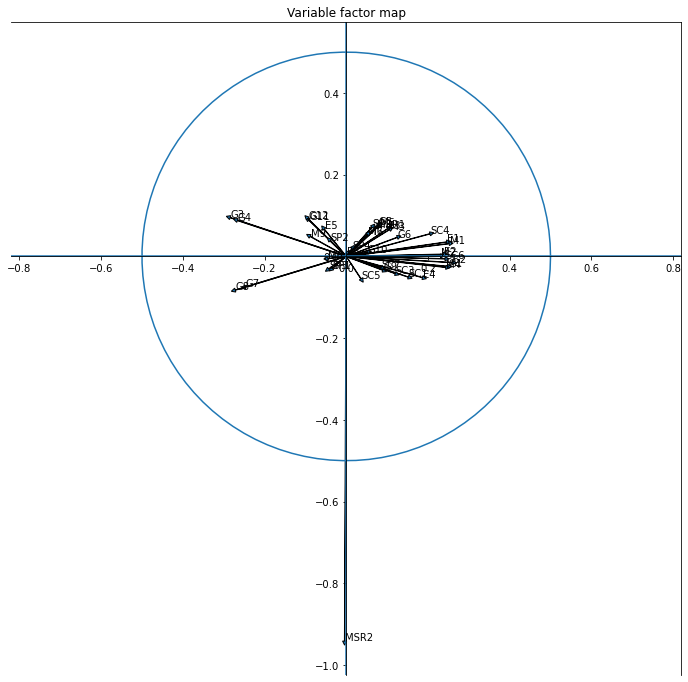

In [30]:
# Plot a variable factor map for the first two dimensions.
(fig, ax) = plt.subplots(figsize=(12, 12))
for i in range(0, len(df_Data_Point_scaled_noNaN_0.columns)):          # Each PCA's number of features
    ax.arrow(0,
             0,  # Start the arrow at the origin
             pca.components_[0, i],  #0 for PC1
             pca.components_[1, i],  #1 for PC2
             head_width=0.01,
             head_length=0.01)
    plt.text(pca.components_[0, i] + 0.001,
             pca.components_[1, i] + 0.001,
             df_Data_Point_scaled_noNaN_0.columns[i])                   

# Name of columns = Name of features

an = np.linspace(0, 2 * np.pi, 100)
plt.plot(0.5 * np.cos(an), 0.5 * np.sin(an))  # Add a unit circle for scale
plt.axis('equal')
ax.set_title('Variable factor map')

ax.spines['left'].set_position('zero')  # 将左边框置于数据坐标原点
ax.spines['bottom'].set_position('zero')  # 将底边框置于数据坐标原点

plt.axvline(0)  #從原點畫個垂直線
plt.axhline(0)  #從原點畫個平行線


plt.show()

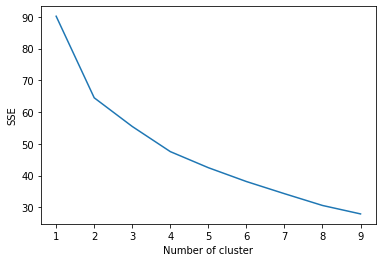

In [31]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(df_Data_Point_scaled_noNaN_0)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

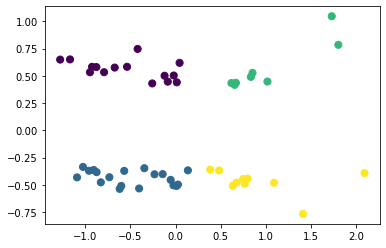

In [32]:
df_Data_Point_scaled_noNaN_2 = df_Data_Point_scaled_noNaN[['PC1','PC2']]

kmeans = KMeans(n_clusters=4)
kmeans.fit(df_Data_Point_scaled_noNaN_2)
y_kmeans = kmeans.predict(df_Data_Point_scaled_noNaN_2)

x = df_Data_Point_scaled_noNaN_2['PC1'].astype('float32')
y = df_Data_Point_scaled_noNaN_2['PC2'].astype('float32')
c = y_kmeans.astype('float32')

plt.scatter(x, y, c=c, s=50, cmap='viridis')

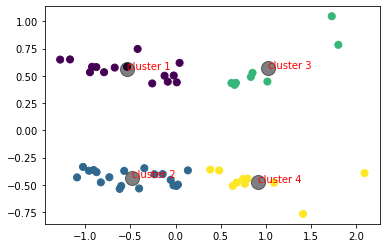

In [33]:
plt.scatter(x, y, c=c, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)


n = ['cluster 1', 'cluster 2', 'cluster 3', 'cluster 4']
for i, txt in enumerate(n):
    plt.annotate(txt, (centers[i, 0], centers[i, 1]), color='red')


plt.show()

In [34]:
centers

array([[-0.53688412,  0.55810693],
       [-0.48636274, -0.43272386],
       [ 1.02400855,  0.57261007],
       [ 0.91020855, -0.4730731 ]])

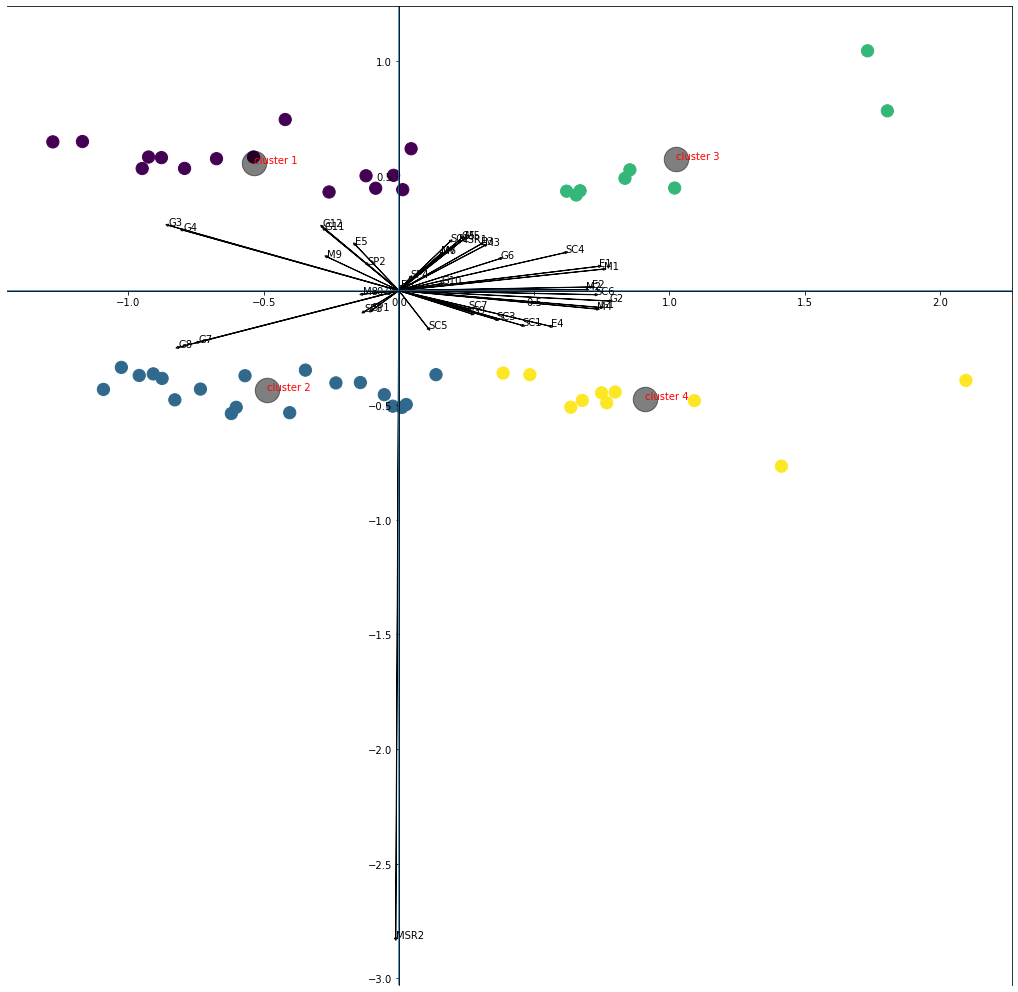

In [35]:
# Plot a variable factor map for the first two dimensions.
(fig, ax) = plt.subplots(figsize=(18, 18))
for i in range(0, len(df_Data_Point_scaled_noNaN_0.columns)):          # Each PCA's number of features
    ax.arrow(0,
             0,  # Start the arrow at the origin
             pca.components_[0, i] * 3,  #0 for PC1
             pca.components_[1, i] * 3,  #1 for PC2
             head_width=0.01,
             head_length=0.01)
    plt.text(pca.components_[0, i] * 3 + 0.001,
             pca.components_[1, i] * 3 + 0.001,
             df_Data_Point_scaled_noNaN_0.columns[i])                   

# Name of columns = Name of features

ax.spines['left'].set_position('zero')  # 将左边框置于数据坐标原点
ax.spines['bottom'].set_position('zero')  # 将底边框置于数据坐标原点

plt.axvline(0)  #從原點畫個垂直線
plt.axhline(0)  #從原點畫個平行線


plt.scatter(x, y, c=c, s=150, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=600, alpha=0.5)


n = ['cluster 1', 'cluster 2', 'cluster 3', 'cluster 4']
for i, txt in enumerate(n):
    plt.annotate(txt, (centers[i, 0], centers[i, 1]), color='red')

plt.show()

In [36]:
df_Data_Point_scaled_noNaN['cluster'] = y_kmeans
df_Data_Point_scaled_noNaN.head()

,G1,G2,G3,G4,G5,G6,G7,G8,G9,G10,G11,...,M2,M3,M4,M5,M6,M7,M8,M9,PC1,PC2,cluster
USER_ID,,,,,,,,,,,,,,,,,,,,,,,
1625,0.726677,1.000000,0.041356,0.053950,0.145739,0.876190,0.125137,0.120432,0.037011,0.341463,0.324749,...,0.780230,0.268626,0.703832,0.139050,1.000000,1.000000,0.704253,1.000000,1.805611,0.784137,2
24539,0.777317,0.678160,0.000000,0.000000,0.000000,0.000000,0.412388,0.444802,0.101183,0.000000,0.047843,...,0.504835,0.212146,0.760868,0.033063,0.000000,0.000000,0.492470,0.000000,1.413988,-0.766002,3
24581,0.116172,0.263531,0.418630,0.375775,0.082061,0.652381,0.231837,0.257402,0.001330,0.292683,1.000000,...,0.132449,0.111009,0.112520,0.074872,0.014193,0.014193,0.498384,0.951613,-0.420357,0.746291,0
24586,0.215344,0.470851,0.354654,0.257203,0.034338,0.582011,0.591282,0.683617,0.020257,0.341463,0.494926,...,0.239028,0.049133,0.208574,0.026776,0.023964,0.023964,0.528787,1.000000,-0.232931,-0.402829,1
24585,0.189777,0.461455,0.635708,0.602556,0.026393,0.492063,0.702175,0.752102,0.065905,0.487805,0.288504,...,0.208116,0.034439,0.183811,0.018769,0.031369,0.031369,0.577220,1.000000,-0.569005,-0.371397,1


In [37]:
cluster_1 = df_Data_Point_scaled_noNaN.loc[df_Data_Point_scaled_noNaN['cluster'] == 0]
cluster_2 = df_Data_Point_scaled_noNaN.loc[df_Data_Point_scaled_noNaN['cluster'] == 1]
cluster_3 = df_Data_Point_scaled_noNaN.loc[df_Data_Point_scaled_noNaN['cluster'] == 2]
cluster_4 = df_Data_Point_scaled_noNaN.loc[df_Data_Point_scaled_noNaN['cluster'] == 3]

In [38]:
mean_cluster_1 = cluster_1.mean() 
mean_cluster_2 = cluster_2.mean() 
mean_cluster_3 = cluster_3.mean() 
mean_cluster_4 = cluster_4.mean() 

In [39]:
list_mean_cluster_1 = mean_cluster_1.tolist() 
list_mean_cluster_2 = mean_cluster_2.tolist() 
list_mean_cluster_3 = mean_cluster_3.tolist()
list_mean_cluster_4 = mean_cluster_4.tolist()

G = []
SC = []
E = []
MSR = []
SP = []
M = []

for i in range(4):
    XYZ1 = eval('list_mean_cluster_'+str(i+1))
    XYZ1 = XYZ1[:12]
    G.append(statistics.mean(XYZ1))
    XYZ2 = eval('list_mean_cluster_'+str(i+1))
    XYZ2 = XYZ2[12:19]
    SC.append(statistics.mean(XYZ2))
    XYZ3 = eval('list_mean_cluster_'+str(i+1))
    XYZ3 = XYZ3[19:25]
    E.append(statistics.mean(XYZ3))
    XYZ4 = eval('list_mean_cluster_'+str(i+1))
    XYZ4 = XYZ4[25:27]
    MSR.append(statistics.mean(XYZ4))
    XYZ5 = eval('list_mean_cluster_'+str(i+1))
    XYZ5 = XYZ5[27:31]
    SP.append(statistics.mean(XYZ5))
    XYZ6 = eval('list_mean_cluster_'+str(i+1))
    XYZ6 = XYZ6[31:40]
    M.append(statistics.mean(XYZ6))


In [40]:
print(G)
print(SC)
print(E)
print(MSR)
print(SP)
print(M)

[0.36571411097324885, 0.34408056795397235, 0.3254605691449157, 0.3213512726994491]
[0.10780588301056922, 0.10989745642095763, 0.2889217926980213, 0.2960729937880945]
[0.22436931566344331, 0.22597026450504049, 0.4373187885795473, 0.3920971163409031]
[0.09740061162079511, 0.5911395461129889, 0.15789850917431195, 0.6232798165137615]
[0.04645723105063899, 0.04110738586701093, 0.0019193305434165647, 0.011576698235660076]
[0.226395222379287, 0.23774602151237886, 0.40684692098873027, 0.3404607362925464]


In [41]:
Learners = {}
for i in range(4):
    Learners['Persona'+str(i+1)] = [G[i], SC[i], E[i], MSR[i], SP[i], M[i]]

Learners

{'Persona1': [0.36571411097324885,
  0.10780588301056922,
  0.22436931566344331,
  0.09740061162079511,
  0.04645723105063899,
  0.226395222379287],
 'Persona2': [0.34408056795397235,
  0.10989745642095763,
  0.22597026450504049,
  0.5911395461129889,
  0.04110738586701093,
  0.23774602151237886],
 'Persona3': [0.3254605691449157,
  0.2889217926980213,
  0.4373187885795473,
  0.15789850917431195,
  0.0019193305434165647,
  0.40684692098873027],
 'Persona4': [0.3213512726994491,
  0.2960729937880945,
  0.3920971163409031,
  0.6232798165137615,
  0.011576698235660076,
  0.3404607362925464]}

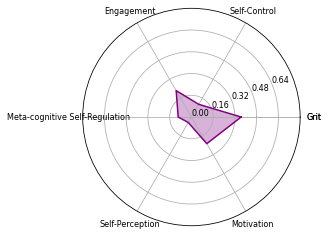

In [42]:
from math import pi

categories = ['Grit', 'Self-Control', 'Engagement', 'Meta-cognitive Self-Regulation', 'Self-Perception', 'Motivation']
N = len(categories)

angles0 = [n / float(N)*2*pi for n in range(N)]

Learners['Persona1'] += Learners['Persona1'][:1]
angles0 += angles0[:1]
categories += categories[:1]

plt.polar(angles0, Learners['Persona1'], 'purple')
# color the area inside
plt.tick_params(labelsize=8)
plt.fill(angles0, Learners['Persona1'], 'purple', alpha=0.3)
plt.xticks(angles0, categories)
axes = plt.gca()
axes.set_ylim(0,0.8)
axes.set_yticks(np.arange(0,0.8,0.16))


plt.show()

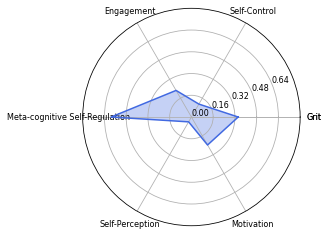

In [43]:
Learners['Persona2'] += Learners['Persona2'][:1]

plt.polar(angles0, Learners['Persona2'], 'royalblue')
# color the area inside
plt.tick_params(labelsize=8)
plt.fill(angles0, Learners['Persona2'], 'royalblue', alpha=0.3)
plt.xticks(angles0, categories)
axes = plt.gca()
axes.set_ylim(0,0.8)
axes.set_yticks(np.arange(0,0.8,0.16))

plt.show()

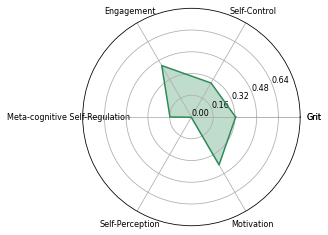

In [44]:
Learners['Persona3'] += Learners['Persona3'][:1]

plt.polar(angles0, Learners['Persona3'], 'seagreen')
# color the area inside
plt.tick_params(labelsize=8)
plt.fill(angles0, Learners['Persona3'],'seagreen', alpha=0.3)
plt.xticks(angles0, categories)
axes = plt.gca()
axes.set_ylim(0,0.8)
axes.set_yticks(np.arange(0,0.8,0.16))

plt.show()

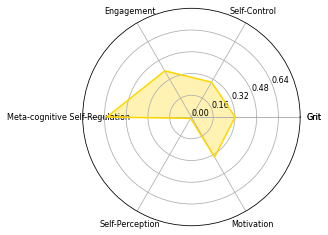

In [45]:
Learners['Persona4'] += Learners['Persona4'][:1]

plt.polar(angles0, Learners['Persona4'], 'gold')
# color the area inside
plt.tick_params(labelsize=8)
plt.fill(angles0, Learners['Persona4'], 'gold', alpha=0.3)
plt.xticks(angles0, categories)
axes = plt.gca()
axes.set_ylim(0,0.8)
axes.set_yticks(np.arange(0,0.8,0.16))

plt.show()

In [46]:
# Rearrange the columns' order according to factor analyisi

columnsTitles = ['PC1', 'PC2', 'cluster',
                 'G1', 'G2', 'G3', 'G4', 'G6', 'G7', 'G8', 'SC1', 'SC4', 'SC6', 'SC7', 'E1', 'E2', 'SP1', 'M1', 'M2', 'M4', 
                 'SC2', 'SC5', 'MSR1', 'M9', 
                 'G5', 'G11', 'E3', 'SP4', 'M3', 'M5', 
                 'G10', 'SC3', 'E4', 'MSR2', 'SP2', 'M8', 
                 'E5', 'E6', 'M6', 'M7', 
                 'G9', 'G12', 'SP3']

arrange_df_Data_Point_scaled_noNaN = df_Data_Point_scaled_noNaN.reindex(columns=columnsTitles)

In [47]:
arrange_cluster_1 = arrange_df_Data_Point_scaled_noNaN.loc[arrange_df_Data_Point_scaled_noNaN['cluster'] == 0]
arrange_cluster_2 = arrange_df_Data_Point_scaled_noNaN.loc[arrange_df_Data_Point_scaled_noNaN['cluster'] == 1]
arrange_cluster_3 = arrange_df_Data_Point_scaled_noNaN.loc[arrange_df_Data_Point_scaled_noNaN['cluster'] == 2]
arrange_cluster_4 = arrange_df_Data_Point_scaled_noNaN.loc[arrange_df_Data_Point_scaled_noNaN['cluster'] == 3]

In [48]:
mean_arrange_cluster_1 = arrange_cluster_1.mean() 
mean_arrange_cluster_2 = arrange_cluster_2.mean() 
mean_arrange_cluster_3 = arrange_cluster_3.mean() 
mean_arrange_cluster_4 = arrange_cluster_4.mean() 

list_mean_arrange_cluster_1 = mean_arrange_cluster_1.tolist() 
list_mean_arrange_cluster_2 = mean_arrange_cluster_2.tolist() 
list_mean_arrange_cluster_3 = mean_arrange_cluster_3.tolist()
list_mean_arrange_cluster_4 = mean_arrange_cluster_4.tolist()

G_arrange = []
SC_arrange = []
E_arrange = []
MSR_arrange = []
SP_arrange = []
M_arrange = []

for i in range(4):
    ABC1 = eval('list_mean_arrange_cluster_'+str(i+1))
    ABC1 = ABC1[3:20]
    G_arrange.append(statistics.mean(ABC1))
    ABC2 = eval('list_mean_arrange_cluster_'+str(i+1))
    ABC2 = ABC2[20:24]
    SC_arrange.append(statistics.mean(ABC2))
    ABC3 = eval('list_mean_arrange_cluster_'+str(i+1))
    ABC3 = ABC3[24:30]
    E_arrange.append(statistics.mean(ABC3))
    ABC4 = eval('list_mean_arrange_cluster_'+str(i+1))
    ABC4 = ABC4[30:36]
    MSR_arrange.append(statistics.mean(ABC4))
    ABC5 = eval('list_mean_arrange_cluster_'+str(i+1))
    ABC5 = ABC5[36:40]
    SP_arrange.append(statistics.mean(ABC5))
    ABC6 = eval('list_mean_arrange_cluster_'+str(i+1))
    ABC6 = ABC6[40:]
    M_arrange.append(statistics.mean(ABC6))

print(G_arrange)
print(SC_arrange)
print(E_arrange)
print(MSR_arrange)
print(SP_arrange)
print(M_arrange)

[0.2520662240500934, 0.2548076785792529, 0.3831424410608031, 0.38389877506987136]
[0.30716567122918276, 0.3048078374789337, 0.34780528271991173, 0.30925610041602075]
[0.09174297536963638, 0.06990036872296468, 0.17096207183046733, 0.10776664331367353]
[0.24534946699245963, 0.39639263371576966, 0.33972783076694657, 0.5002810425147658]
[0.22338642908567313, 0.23265606984523943, 0.280518768319963, 0.1963493777640646]
[0.15924156376925774, 0.15371641565121597, 0.14871054058188302, 0.14711159189325324]


In [49]:
Learners_arrange = {}
for i in range(4):
    Learners_arrange['Persona_arrange'+str(i+1)] = [G_arrange[i], SC_arrange[i], E_arrange[i], MSR_arrange[i], SP_arrange[i], M_arrange[i]]

Learners_arrange

{'Persona_arrange1': [0.2520662240500934,
  0.30716567122918276,
  0.09174297536963638,
  0.24534946699245963,
  0.22338642908567313,
  0.15924156376925774],
 'Persona_arrange2': [0.2548076785792529,
  0.3048078374789337,
  0.06990036872296468,
  0.39639263371576966,
  0.23265606984523943,
  0.15371641565121597],
 'Persona_arrange3': [0.3831424410608031,
  0.34780528271991173,
  0.17096207183046733,
  0.33972783076694657,
  0.280518768319963,
  0.14871054058188302],
 'Persona_arrange4': [0.38389877506987136,
  0.30925610041602075,
  0.10776664331367353,
  0.5002810425147658,
  0.1963493777640646,
  0.14711159189325324]}

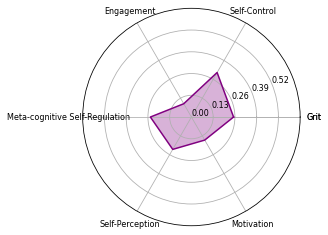

In [50]:
from math import pi

categories = ['Grit', 'Self-Control', 'Engagement', 'Meta-cognitive Self-Regulation', 'Self-Perception', 'Motivation']
N = len(categories)

angles1 = [n / float(N)*2*pi for n in range(N)]


Learners_arrange['Persona_arrange1'] += Learners_arrange['Persona_arrange1'][:1]
angles1 += angles1[:1]
categories += categories[:1]

plt.polar(angles1, Learners_arrange['Persona_arrange1'], 'purple')
# color the area inside
plt.tick_params(labelsize=8)
plt.fill(angles1, Learners_arrange['Persona_arrange1'], 'purple', alpha=0.3)
plt.xticks(angles1, categories)
axes = plt.gca()
axes.set_ylim(0,0.65)
axes.set_yticks(np.arange(0,0.65,0.13))


plt.show()

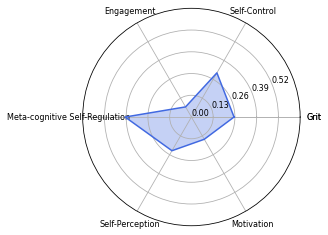

In [51]:
Learners_arrange['Persona_arrange2'] += Learners_arrange['Persona_arrange2'][:1]

plt.polar(angles1, Learners_arrange['Persona_arrange2'], 'royalblue')
# color the area inside
plt.tick_params(labelsize=8)
plt.fill(angles1, Learners_arrange['Persona_arrange2'], 'royalblue', alpha=0.3)
plt.xticks(angles1, categories)
axes = plt.gca()
axes.set_ylim(0,0.65)
axes.set_yticks(np.arange(0,0.65,0.13))


plt.show()

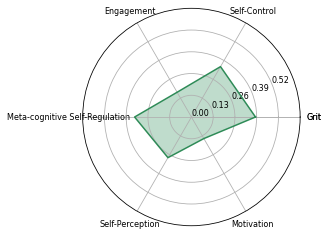

In [52]:
Learners_arrange['Persona_arrange3'] += Learners_arrange['Persona_arrange3'][:1]

plt.polar(angles1, Learners_arrange['Persona_arrange3'], 'seagreen')
# color the area inside
plt.tick_params(labelsize=8)
plt.fill(angles1, Learners_arrange['Persona_arrange3'], 'seagreen', alpha=0.3)
plt.xticks(angles1, categories)
axes = plt.gca()
axes.set_ylim(0,0.65)
axes.set_yticks(np.arange(0,0.65,0.13))


plt.show()

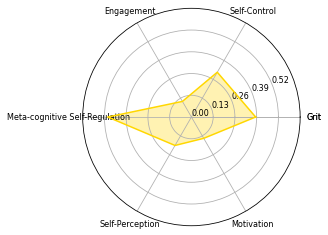

In [53]:
Learners_arrange['Persona_arrange4'] += Learners_arrange['Persona_arrange4'][:1]

plt.polar(angles1, Learners_arrange['Persona_arrange4'], 'gold')
# color the area inside
plt.tick_params(labelsize=8)
plt.fill(angles1, Learners_arrange['Persona_arrange4'], 'gold', alpha=0.3)
plt.xticks(angles1, categories)
axes = plt.gca()
axes.set_ylim(0,0.65)
axes.set_yticks(np.arange(0,0.65,0.13))


plt.show()

In [54]:
df_Data_Point_scaled_noNaN.shape

(52, 43)

In [55]:
len(user)

52

In [56]:
df_survey = pd.read_excel("C2-t3.xlsx")
df_survey.shape

(74, 84)

In [57]:
df_non_cog = df_survey.iloc[:, :57]

In [58]:
df_non_cog.set_index('USER ID', inplace=True)

In [59]:
df_non_cog_no24539 = df_non_cog.reindex(user)

In [60]:
df_non_cog_no24539.head()

,学习者非认知能力调查表 题1,学习者非认知能力调查表 题2,学习者非认知能力调查表 题3,学习者非认知能力调查表 题4,学习者非认知能力调查表 题5,学习者非认知能力调查表 题6,学习者非认知能力调查表 题7,学习者非认知能力调查表 题8,学习者非认知能力调查表 题9,学习者非认知能力调查表 题10,学习者非认知能力调查表 题11,...,学习者非认知能力调查表 题46,学习者非认知能力调查表 题47,学习者非认知能力调查表 题48,学习者非认知能力调查表 题49,学习者非认知能力调查表 题50,学习者非认知能力调查表 题51,学习者非认知能力调查表 题52,学习者非认知能力调查表 题53,学习者非认知能力调查表 题54,学习者非认知能力调查表 题55,学习者非认知能力调查表 题56
USER ID,,,,,,,,,,,,,,,,,,,,,,,
1625,2.0,4.0,5.0,4.0,5.0,5.0,4.0,5.0,5.0,4.0,5.0,...,5.0,4.0,5.0,5.0,5.0,4.0,4.0,5.0,6.0,3.0,3.0
24539,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24581,2.0,4.0,3.0,3.0,3.0,5.0,3.0,4.0,3.0,3.0,5.0,...,3.0,2.0,4.0,4.0,3.0,5.0,4.0,4.0,4.0,3.0,3.0
24586,1.0,6.0,3.0,3.0,5.0,4.0,5.0,6.0,5.0,4.0,6.0,...,5.0,4.0,4.0,5.0,1.0,6.0,4.0,6.0,6.0,5.0,5.0
24585,2.0,3.0,3.0,3.0,4.0,4.0,3.0,4.0,4.0,3.0,3.0,...,3.0,4.0,6.0,-1.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0


In [61]:
#Grit = 题4 - 题13
df_non_cog_no24539['Grit'] = df_non_cog_no24539.iloc[:, 3:13].sum(1) / len(df_non_cog_no24539.iloc[0, 3:13])

#Self-control = 题14 - 题25
df_non_cog_no24539['Self-control'] = df_non_cog_no24539.iloc[:, 13:25].sum(1) / len(df_non_cog_no24539.iloc[0, 13:25])

#Engagement = 题26 - 题32
df_non_cog_no24539['Engagement'] = df_non_cog_no24539.iloc[:, 25:32].sum(1) / len(df_non_cog_no24539.iloc[0, 25:32])

#Metacognitive Self-regulation = 题33 - 题43
df_non_cog_no24539['Metacognitive Self-regulation'] = df_non_cog_no24539.iloc[:, 32:43].sum(1) / len(df_non_cog_no24539.iloc[0, 32:43])

#Self-perception = 题44 - 题49
df_non_cog_no24539['Self-perception'] = df_non_cog_no24539.iloc[:, 43:49].sum(1) / len(df_non_cog_no24539.iloc[0, 43:49])

#Motivation = 题50 - 题56
df_non_cog_no24539['Motivation'] = df_non_cog_no24539.iloc[:, 49:56].sum(1) / len(df_non_cog_no24539.iloc[0, 49:56])


In [62]:
df_non_cog_no24539.head()

,学习者非认知能力调查表 题1,学习者非认知能力调查表 题2,学习者非认知能力调查表 题3,学习者非认知能力调查表 题4,学习者非认知能力调查表 题5,学习者非认知能力调查表 题6,学习者非认知能力调查表 题7,学习者非认知能力调查表 题8,学习者非认知能力调查表 题9,学习者非认知能力调查表 题10,学习者非认知能力调查表 题11,...,学习者非认知能力调查表 题52,学习者非认知能力调查表 题53,学习者非认知能力调查表 题54,学习者非认知能力调查表 题55,学习者非认知能力调查表 题56,Grit,Self-control,Engagement,Metacognitive Self-regulation,Self-perception,Motivation
USER ID,,,,,,,,,,,,,,,,,,,,,,,
1625,2.0,4.0,5.0,4.0,5.0,5.0,4.0,5.0,5.0,4.0,5.0,...,4.0,5.0,6.0,3.0,3.0,4.3,4.750000,4.142857,4.636364,4.666667,4.285714
24539,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
24581,2.0,4.0,3.0,3.0,3.0,5.0,3.0,4.0,3.0,3.0,5.0,...,4.0,4.0,4.0,3.0,3.0,3.6,3.666667,3.428571,3.272727,3.333333,3.714286
24586,1.0,6.0,3.0,3.0,5.0,4.0,5.0,6.0,5.0,4.0,6.0,...,4.0,6.0,6.0,5.0,5.0,4.5,4.833333,4.571429,4.818182,5.000000,4.714286
24585,2.0,3.0,3.0,3.0,4.0,4.0,3.0,4.0,4.0,3.0,3.0,...,4.0,4.0,4.0,4.0,4.0,3.5,3.250000,3.285714,3.000000,3.166667,4.000000


In [63]:
six_df_non_cog_no24539 = df_non_cog_no24539.iloc[:, 56:]

In [64]:
six_df_non_cog_no24539.head()

,Grit,Self-control,Engagement,Metacognitive Self-regulation,Self-perception,Motivation
USER ID,,,,,,
1625,4.3,4.750000,4.142857,4.636364,4.666667,4.285714
24539,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
24581,3.6,3.666667,3.428571,3.272727,3.333333,3.714286
24586,4.5,4.833333,4.571429,4.818182,5.000000,4.714286
24585,3.5,3.250000,3.285714,3.000000,3.166667,4.000000


In [65]:
six_df_non_cog_no24539.shape

(52, 6)

In [66]:
df_Data_Point_scaled_noNaN.head()

,G1,G2,G3,G4,G5,G6,G7,G8,G9,G10,G11,...,M2,M3,M4,M5,M6,M7,M8,M9,PC1,PC2,cluster
USER_ID,,,,,,,,,,,,,,,,,,,,,,,
1625,0.726677,1.000000,0.041356,0.053950,0.145739,0.876190,0.125137,0.120432,0.037011,0.341463,0.324749,...,0.780230,0.268626,0.703832,0.139050,1.000000,1.000000,0.704253,1.000000,1.805611,0.784137,2
24539,0.777317,0.678160,0.000000,0.000000,0.000000,0.000000,0.412388,0.444802,0.101183,0.000000,0.047843,...,0.504835,0.212146,0.760868,0.033063,0.000000,0.000000,0.492470,0.000000,1.413988,-0.766002,3
24581,0.116172,0.263531,0.418630,0.375775,0.082061,0.652381,0.231837,0.257402,0.001330,0.292683,1.000000,...,0.132449,0.111009,0.112520,0.074872,0.014193,0.014193,0.498384,0.951613,-0.420357,0.746291,0
24586,0.215344,0.470851,0.354654,0.257203,0.034338,0.582011,0.591282,0.683617,0.020257,0.341463,0.494926,...,0.239028,0.049133,0.208574,0.026776,0.023964,0.023964,0.528787,1.000000,-0.232931,-0.402829,1
24585,0.189777,0.461455,0.635708,0.602556,0.026393,0.492063,0.702175,0.752102,0.065905,0.487805,0.288504,...,0.208116,0.034439,0.183811,0.018769,0.031369,0.031369,0.577220,1.000000,-0.569005,-0.371397,1


In [67]:
df_Data_Point_scaled_noNaN_no24539 = df_Data_Point_scaled_noNaN

In [68]:
merge_non_cog = df_Data_Point_scaled_noNaN_no24539.merge(six_df_non_cog_no24539, left_index=True, right_index=True, how='left')
merge_non_cog

,G1,G2,G3,G4,G5,G6,G7,G8,G9,G10,G11,...,M8,M9,PC1,PC2,cluster,Grit,Self-control,Engagement,Metacognitive Self-regulation,Self-perception,Motivation
USER_ID,,,,,,,,,,,,,,,,,,,,,,,
1625,0.726677,1.000000,0.041356,0.053950,0.145739,0.876190,0.125137,0.120432,0.037011,0.341463,0.324749,...,0.704253,1.000000,1.805611,0.784137,2,4.3,4.750000,4.142857,4.636364,4.666667,4.285714
24539,0.777317,0.678160,0.000000,0.000000,0.000000,0.000000,0.412388,0.444802,0.101183,0.000000,0.047843,...,0.492470,0.000000,1.413988,-0.766002,3,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
24581,0.116172,0.263531,0.418630,0.375775,0.082061,0.652381,0.231837,0.257402,0.001330,0.292683,1.000000,...,0.498384,0.951613,-0.420357,0.746291,0,3.6,3.666667,3.428571,3.272727,3.333333,3.714286
24586,0.215344,0.470851,0.354654,0.257203,0.034338,0.582011,0.591282,0.683617,0.020257,0.341463,0.494926,...,0.528787,1.000000,-0.232931,-0.402829,1,4.5,4.833333,4.571429,4.818182,5.000000,4.714286
24585,0.189777,0.461455,0.635708,0.602556,0.026393,0.492063,0.702175,0.752102,0.065905,0.487805,0.288504,...,0.577220,1.000000,-0.569005,-0.371397,1,3.5,3.250000,3.285714,3.000000,3.166667,4.000000
8976,0.100388,0.283496,0.352732,0.402586,0.017898,0.330688,0.806957,0.895405,0.040940,0.292683,0.297719,...,0.795618,1.000000,-0.828370,-0.476607,1,3.1,4.750000,4.571429,4.727273,5.000000,4.571429
24603,0.184462,0.416234,0.292121,0.331651,0.083600,0.957143,0.253893,0.249801,0.084667,0.463415,0.308970,...,0.504865,1.000000,0.045014,0.618860,0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
24606,0.088011,0.197797,0.896284,0.809123,0.021834,0.367725,0.738376,0.818202,0.036470,0.317073,0.347927,...,0.586789,1.000000,-1.026102,-0.335063,1,3.8,3.750000,3.571429,3.181818,3.166667,3.571429
24589,0.082610,0.156844,0.623338,0.521918,0.021755,0.346561,0.780955,0.884422,0.003153,0.268293,0.538841,...,0.557961,0.951613,-0.960031,-0.370318,1,3.9,5.000000,4.714286,5.000000,5.000000,4.000000


In [69]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso



#Expert Engineering版
X_Grit_EE = merge_non_cog.loc[:, ['G1', 'G2', 'G3', 'G4', 'G5', 'G6', 'G7', 'G8', 'G9', 'G10', 'G11', 'G12']]
Y_Grit = merge_non_cog.loc[:, 'Grit']

X_Self_control_EE = merge_non_cog.loc[:, ['SC1', 'SC2', 'SC3', 'SC4', 'SC5', 'SC6', 'SC7']]
Y_Self_control = merge_non_cog.loc[:, 'Self-control']

X_Engagement_EE = merge_non_cog.loc[:, ['E1', 'E2', 'E3', 'E4', 'E5', 'E6']]
Y_Engagement = merge_non_cog.loc[:, 'Engagement']

X_Metacognitive_EE = merge_non_cog.loc[:, ['MSR1', 'MSR2']]
Y_Metacognitive = merge_non_cog.loc[:, 'Metacognitive Self-regulation']

X_Self_perception_EE = merge_non_cog.loc[:, ['SP1', 'SP2', 'SP3', 'SP4']]
Y_Self_perception = merge_non_cog.loc[:, 'Self-perception']

X_Motivation_EE = merge_non_cog.loc[:, ['M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9']]
Y_Motivation = merge_non_cog.loc[:, 'Motivation']


#Exploratory Factor Analysis版
X_Grit_EFA = merge_non_cog.loc[:, ['G1', 'G2', 'G3', 'G4', 'G6', 'G7', 'G8', 'SC1', 'SC4', 'SC6', 'SC7', 'E1', 'E2', 'SP1', 'M1', 'M2', 'M4']]
X_Self_control_EFA = merge_non_cog.loc[:, ['SC2', 'SC5', 'MSR1', 'M9']]
X_Engagement_EFA = merge_non_cog.loc[:, ['G5', 'G11', 'E3', 'SP4', 'M3', 'M5']]
X_Metacognitive_EFA = merge_non_cog.loc[:, ['G10', 'SC3', 'E4', 'MSR2', 'SP2', 'M8']]
X_Self_perception_EFA = merge_non_cog.loc[:, ['E5', 'E6', 'M6', 'M7']]
X_Motivation_EFA = merge_non_cog.loc[:, ['G9', 'G12', 'SP3']]

In [70]:
#Grit: Linear Regression of EE
lin_reg_EE_G = LinearRegression()
MSEs = cross_val_score(lin_reg_EE_G, X_Grit_EE, Y_Grit, scoring='neg_mean_squared_error', cv=5)
mean_MSE = np.mean(MSEs)
lin_reg_EE_G.fit(X_Grit_EE, Y_Grit)

print(lin_reg_EE_G.intercept_)
print(lin_reg_EE_G.coef_)
print(MSEs)
print(mean_MSE)

2.0061955371855693
[-6.57331049  5.26630202  8.6930578  -8.81169781  2.7894749  -1.38430979 -5.0348349   5.14954911  1.14235656  0.22343512  0.04178874  0.8299529 ]
[ -1.94102858  -3.82448821  -6.38503045  -2.66995094 -14.73336801]
-5.910773237295308


In [71]:
#Grit: Linear Regression of EFA
lin_reg_EFA_G = LinearRegression()
MSEs = cross_val_score(lin_reg_EFA_G, X_Grit_EFA, Y_Grit, scoring='neg_mean_squared_error', cv=5)
mean_MSE = np.mean(MSEs)
lin_reg_EFA_G.fit(X_Grit_EFA, Y_Grit)

print(lin_reg_EFA_G.intercept_)
print(lin_reg_EFA_G.coef_)
print(MSEs)
print(mean_MSE)

4.006402410297802
[ 107.53683702   -2.02661177    5.6136656    -7.16315944   -2.36198511  -10.2610018    10.14005426    0.72770805   -6.56936571   -9.7251449     7.84470746   95.71830065 -158.14940059   -0.61047521  -81.38886884  183.67847737 -128.73329965]
[ -788.04315097 -1653.79016721    -5.65554386    -2.20099279    -5.77554666]
-491.09308029948625


In [72]:
#Self-control: Linear Regression of EE
lin_reg_EE_SC = LinearRegression()
MSEs = cross_val_score(lin_reg_EE_SC, X_Self_control_EE, Y_Self_control, scoring='neg_mean_squared_error', cv=5)
mean_MSE = np.mean(MSEs)
lin_reg_EE_SC.fit(X_Self_control_EE, Y_Self_control)

print(lin_reg_EE_SC.intercept_)
print(lin_reg_EE_SC.coef_)
print(MSEs)
print(mean_MSE)

3.5461396481080305
[  1.19812468   0.70966911  -0.21219752  -3.52053496 -18.43440057  -3.80960173  19.28881596]
[-48.27214564  -4.35441251  -4.08227061  -4.68442022 -10.02567343]
-14.283784484729429


In [73]:
#Self-control: Linear Regression of EFA
lin_reg_EFA_SC = LinearRegression()
MSEs = cross_val_score(lin_reg_EFA_SC, X_Self_control_EFA, Y_Self_control, scoring='neg_mean_squared_error', cv=5)
mean_MSE = np.mean(MSEs)
lin_reg_EFA_SC.fit(X_Self_control_EFA, Y_Self_control)

print(lin_reg_EFA_SC.intercept_)
print(lin_reg_EFA_SC.coef_)
print(MSEs)
print(mean_MSE)

-2.651061951284398
[ 1.85092481  2.68270735 -2.15414651  6.36087552]
[-27.57578799  -3.75955499  -4.87364229  -2.75444036  -3.8311412 ]
-8.558913365007026


In [74]:
#Engagement: Linear Regression of EE
lin_reg_EE_E = LinearRegression()
MSEs = cross_val_score(lin_reg_EE_E, X_Engagement_EE, Y_Engagement, scoring='neg_mean_squared_error', cv=5)
mean_MSE = np.mean(MSEs)
lin_reg_EE_E.fit(X_Engagement_EE, Y_Engagement)

print(lin_reg_EE_E.intercept_)
print(lin_reg_EE_E.coef_)
print(MSEs)
print(mean_MSE)

3.176592137834213
[ 3.58816249 -4.1066653  -0.78570534 -0.97479503  1.5038274  -0.08936938]
[-10.77868804  -4.8703285   -3.28977328  -5.32740898 -13.83114647]
-7.619469054340018


In [75]:
#Engagement: Linear Regression of EFA
lin_reg_EFA_E = LinearRegression()
MSEs = cross_val_score(lin_reg_EFA_E, X_Engagement_EFA, Y_Engagement, scoring='neg_mean_squared_error', cv=5)
mean_MSE = np.mean(MSEs)
lin_reg_EFA_E.fit(X_Engagement_EFA, Y_Engagement)

print(lin_reg_EFA_E.intercept_)
print(lin_reg_EFA_E.coef_)
print(MSEs)
print(mean_MSE)

4.724535738389153
[-2.26671229e+02  9.36612720e-01  2.06801199e+02  1.18886147e-01 -2.12135535e+02  2.30392820e+02]
[-2.0560998  -3.56954259 -6.32560908 -2.67018055 -1.36220976]
-3.196728355369806


In [76]:
#Metacognitive Self-regulation: Linear Regression of EE
lin_reg_EE_MSR = LinearRegression()
MSEs = cross_val_score(lin_reg_EE_MSR, X_Metacognitive_EE, Y_Metacognitive, scoring='neg_mean_squared_error', cv=5)
mean_MSE = np.mean(MSEs)
lin_reg_EE_MSR.fit(X_Metacognitive_EE, Y_Metacognitive)

print(lin_reg_EE_MSR.intercept_)
print(lin_reg_EE_MSR.coef_)
print(MSEs)
print(mean_MSE)

3.301521504983307
[-1.2227946  -0.02331435]
[-2.83087729 -4.12754117 -3.59139516 -2.41484209 -1.30516975]
-2.853965092864456


In [77]:
#Metacognitive Self-regulation: Linear Regression of EFA
lin_reg_EFA_MSR = LinearRegression()
MSEs = cross_val_score(lin_reg_EFA_MSR, X_Metacognitive_EFA, Y_Metacognitive, scoring='neg_mean_squared_error', cv=5)
mean_MSE = np.mean(MSEs)
lin_reg_EFA_MSR.fit(X_Metacognitive_EFA, Y_Metacognitive)

print(lin_reg_EFA_MSR.intercept_)
print(lin_reg_EFA_MSR.coef_)
print(MSEs)
print(mean_MSE)

1.9829929413944265
[ 2.02686553 -0.04881731 -2.34575669  0.0116398  -1.49170517  1.31844209]
[-2.37847526 -4.17112055 -3.87377082 -2.57757365 -1.02093069]
-2.8043741959255586


In [78]:
#Self-perception: Linear Regression of EE
lin_reg_EE_SP = LinearRegression()
MSEs = cross_val_score(lin_reg_EE_SP, X_Self_perception_EE, Y_Self_perception, scoring='neg_mean_squared_error', cv=5)
mean_MSE = np.mean(MSEs)
lin_reg_EE_SP.fit(X_Self_perception_EE, Y_Self_perception)

print(lin_reg_EE_SP.intercept_)
print(lin_reg_EE_SP.coef_)
print(MSEs)
print(mean_MSE)

2.972327390156417
[ 1.55344174 -0.14322005  2.39590539 -1.0766595 ]
[  -5.41080338 -526.65472155   -9.98331991   -5.87194457   -2.27005263]
-110.03816840769238


In [79]:
#Self-perception: Linear Regression of EFA
lin_reg_EFA_SP = LinearRegression()
MSEs = cross_val_score(lin_reg_EFA_SP, X_Self_perception_EFA, Y_Self_perception, scoring='neg_mean_squared_error', cv=5)
mean_MSE = np.mean(MSEs)
lin_reg_EFA_SP.fit(X_Self_perception_EFA, Y_Self_perception)

print(lin_reg_EFA_SP.intercept_)
print(lin_reg_EFA_SP.coef_)
print(MSEs)
print(mean_MSE)

2.1675158735196414
[ 2.80509319 -0.17324964  0.36320314  0.36320314]
[-14.48274955  -5.68208211  -4.35215018  -5.55752828  -2.09354192]
-6.433610408382577


In [80]:
#Motivation: Linear Regression of EE
lin_reg_EE_M = LinearRegression()
MSEs = cross_val_score(lin_reg_EE_M, X_Motivation_EE, Y_Motivation, scoring='neg_mean_squared_error', cv=5)
mean_MSE = np.mean(MSEs)
lin_reg_EE_M.fit(X_Motivation_EE, Y_Motivation)

print(lin_reg_EE_M.intercept_)
print(lin_reg_EE_M.coef_)
print(MSEs)
print(mean_MSE)

1.520572444324221
[14.09241823 -4.96627821  0.48492972 -9.19856725 -2.94631445 -1.78744441 -1.78744441 -1.40233385  3.10408405]
[-15.33296545  -6.55862167  -2.51625971  -1.80834579 -64.7262006 ]
-18.18847864318318


In [81]:
#Motivation: Linear Regression of EFA
lin_reg_EFA_M = LinearRegression()
MSEs = cross_val_score(lin_reg_EFA_M, X_Motivation_EFA, Y_Motivation, scoring='neg_mean_squared_error', cv=5)
mean_MSE = np.mean(MSEs)
lin_reg_EFA_M.fit(X_Motivation_EFA, Y_Motivation)

print(lin_reg_EFA_M.intercept_)
print(lin_reg_EFA_M.coef_)
print(MSEs)
print(mean_MSE)

2.440859647266482
[0.4871647  1.35383803 2.4330949 ]
[-8.36324298 -4.49884464 -3.21902549 -2.05677761 -2.16655594]
-4.060889333236349


In [82]:
#Grit: Lasso Regression of EE
lasso_EE_G = Lasso(alpha=0.005)
lasso_EE_G.fit(X_Grit_EE, Y_Grit)
list(lasso_EE_G.coef_)

[-4.5952783125003105,
 3.5471415636441903,
 5.1205721837314,
 -4.687211851310037,
 1.9256115991894918,
 -0.9819274340910975,
 0.0,
 0.1562113874913923,
 0.5097711151882451,
 0.5897445087382093,
 0.0,
 0.9113880298330673]

In [83]:
#Grit: Lasso Regression of EFA
lasso_EFA_G = Lasso(alpha=0.005)
lasso_EFA_G.fit(X_Grit_EFA, Y_Grit)
list(lasso_EFA_G.coef_)


[-0.0,
 2.1567534971371107,
 5.352315907326004,
 -5.258454111800054,
 -1.279062240234515,
 0.0,
 0.41221534443291136,
 0.8083012369556044,
 -0.46490193539751196,
 -0.8208181989956632,
 -0.6432423418389358,
 6.202641178157396,
 0.0,
 -0.0,
 0.0,
 0.0,
 -7.837173956706139]

In [84]:
#Self-control: Lasso Regression of EE
lasso_EE_SC = Lasso(alpha=0.005)
lasso_EE_SC.fit(X_Self_control_EE, Y_Self_control)
list(lasso_EE_SC.coef_)

[0.9789375906657264,
 1.206619896214001,
 0.0374375685969092,
 0.0,
 -1.5969428778669417,
 -2.7774824573666654,
 0.16384049606885923]

In [85]:
#Self-control: Lasso Regression of EFA
lasso_EFA_SC = Lasso(alpha=0.005)
lasso_EFA_SC.fit(X_Self_control_EFA, Y_Self_control)
list(lasso_EFA_SC.coef_)

[1.2079431180145612, 1.5351829000977997, -1.752371928504636, 5.404037659606183]

In [86]:
#Engagement: Lasso Regression of EE
lasso_EE_E = Lasso(alpha=0.005)
lasso_EE_E.fit(X_Engagement_EE, Y_Engagement)
list(lasso_EE_E.coef_)

[0.0, -0.7371675836319157, -0.0, -0.8481807334613517, 1.4267837010165951, 0.0]

In [87]:
#Engagement: Lasso Regression of EFA
lasso_EFA_E = Lasso(alpha=0.005)
lasso_EFA_E.fit(X_Engagement_EFA, Y_Engagement)
list(lasso_EFA_E.coef_)

[5.491237336905143, 1.682066290520078, -0.0, -0.0, -6.0416634199221075, 0.0]

In [88]:
#Metacognitive Self-regulation: Lasso Regression of EE
lasso_EE_MSR = Lasso(alpha=0.005)
lasso_EE_MSR.fit(X_Metacognitive_EE, Y_Metacognitive)
list(lasso_EE_MSR.coef_)

[-1.0475548070275238, -0.0]

In [89]:
#Metacognitive Self-regulation: Lasso Regression of EFA
lasso_EFA_MSR = Lasso(alpha=0.005)
lasso_EFA_MSR.fit(X_Metacognitive_EFA, Y_Metacognitive)
list(lasso_EFA_MSR.coef_)

[1.8576754631070875,
 -0.0,
 -2.2410478093469637,
 0.002953522667627156,
 -1.1654641114411892,
 0.9826436198773438]

In [90]:
#Self-perception: Lasso Regression of EE
lasso_EE_SP = Lasso(alpha=0.005)
lasso_EE_SP.fit(X_Self_perception_EE, Y_Self_perception)
list(lasso_EE_SP.coef_)

[1.3406178281485666, -0.0, 2.213910628965237, -0.8421960796433777]

In [91]:
#Self-perception: Lasso Regression of EFA
lasso_EFA_SP = Lasso(alpha=0.005)
lasso_EFA_SP.fit(X_Self_perception_EFA, Y_Self_perception)
list(lasso_EFA_SP.coef_)

[2.444485616297833, -0.04881338726535971, 0.43362937764131115, 0.0]

In [92]:
#Motivation: Lasso Regression of EE
lasso_EE_M = Lasso(alpha=0.005)
lasso_EE_M.fit(X_Motivation_EE, Y_Motivation)
list(lasso_EE_M.coef_)

[0.7018222782839231,
 0.0,
 -0.0,
 -1.6719604262784007,
 -0.0,
 0.38873037382482456,
 0.0,
 -1.237614515235861,
 3.4197788272410303]

In [93]:
#Motivation: Lasso Regression of EE
lasso_EFA_M = Lasso(alpha=0.005)
lasso_EFA_M.fit(X_Motivation_EFA, Y_Motivation)
list(lasso_EFA_M.coef_)

[0.0, 0.9621365430595492, 2.1645460689862315]

In [94]:
listEE_G = lin_reg_EE_G.coef_.tolist()
listEE_SC = lin_reg_EE_SC.coef_.tolist()
listEE_E = lin_reg_EE_E.coef_.tolist()
listEE_MSR = lin_reg_EE_MSR.coef_.tolist()
listEE_SP = lin_reg_EE_SP.coef_.tolist()
listEE_M = lin_reg_EE_M.coef_.tolist()

coef_list_reg_EE = listEE_G + listEE_SC + listEE_E + listEE_MSR + listEE_SP + listEE_M

In [95]:
listEE_G2 = lasso_EE_G.coef_.tolist()
listEE_SC2 = lasso_EE_SC.coef_.tolist()
listEE_E2 = lasso_EE_E.coef_.tolist()
listEE_MSR2 = lasso_EE_MSR.coef_.tolist()
listEE_SP2 = lasso_EE_SP.coef_.tolist()
listEE_M2 = lasso_EE_M.coef_.tolist()

coef_list_lasso_EE = listEE_G2 + listEE_SC2 + listEE_E2 + listEE_MSR2 + listEE_SP2 + listEE_M2

In [96]:
listEFA_G = lin_reg_EFA_G.coef_.tolist()
listEFA_SC = lin_reg_EFA_SC.coef_.tolist()
listEFA_E = lin_reg_EFA_E.coef_.tolist()
listEFA_MSR = lin_reg_EFA_MSR.coef_.tolist()
listEFA_SP = lin_reg_EFA_SP.coef_.tolist()
listEFA_M = lin_reg_EFA_M.coef_.tolist()

coef_list_reg_EFA = listEFA_G + listEFA_SC + listEFA_E + listEFA_MSR + listEFA_SP + listEFA_M

In [97]:
listEFA_G2 = lasso_EFA_G.coef_.tolist()
listEFA_SC2 = lasso_EFA_SC.coef_.tolist()
listEFA_E2 = lasso_EFA_E.coef_.tolist()
listEFA_MSR2 = lasso_EFA_MSR.coef_.tolist()
listEFA_SP2 = lasso_EFA_SP.coef_.tolist()
listEFA_M2 = lasso_EFA_M.coef_.tolist()

coef_list_lasso_EFA = listEFA_G2 + listEFA_SC2 + listEFA_E2 + listEFA_MSR2 + listEFA_SP2 + listEFA_M2

In [98]:
EE_coef_table = pd.DataFrame(columns = ['G1', 'G2', 'G3', 'G4', 'G5', 'G6', 'G7', 'G8', 'G9', 'G10', 'G11', 'G12', 
                                        'SC1', 'SC2', 'SC3', 'SC4', 'SC5', 'SC6', 'SC7', 
                                        'E1', 'E2', 'E3', 'E4', 'E5', 'E6', 
                                        'MSR1', 'MSR2', 
                                        'SP1', 'SP2', 'SP3', 'SP4', 
                                        'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9'], index = ['Linear', 'LASSO'])
EE_coef_table.loc['Linear'] = coef_list_reg_EE
EE_coef_table.loc['LASSO'] = coef_list_lasso_EE

In [99]:
EE_coef_table

,G1,G2,G3,G4,G5,G6,G7,G8,G9,G10,G11,...,SP3,SP4,M1,M2,M3,M4,M5,M6,M7,M8,M9
Linear,-6.57331,5.2663,8.69306,-8.8117,2.78947,-1.38431,-5.03483,5.14955,1.14236,0.223435,0.0417887,...,2.39591,-1.07666,14.0924,-4.96628,0.48493,-9.19857,-2.94631,-1.78744,-1.78744,-1.40233,3.10408
LASSO,-4.59528,3.54714,5.12057,-4.68721,1.92561,-0.981927,0,0.156211,0.509771,0.589745,0,...,2.21391,-0.842196,0.701822,0,-0,-1.67196,-0,0.38873,0,-1.23761,3.41978


In [100]:
EFA_coef_table = pd.DataFrame(columns = ['G1', 'G2', 'G3', 'G4', 'G6', 'G7', 'G8', 'SC1', 'SC4', 'SC6', 'SC7', 'E1', 'E2', 'SP1', 'M1', 'M2', 'M4', 
                 'SC2', 'SC5', 'MSR1', 'M9', 
                 'G5', 'G11', 'E3', 'SP4', 'M3', 'M5', 
                 'G10', 'SC3', 'E4', 'MSR2', 'SP2', 'M8', 
                 'E5', 'E6', 'M6', 'M7', 
                 'G9', 'G12', 'SP3'], index = ['Linear', 'LASSO'])
EFA_coef_table.loc['Linear'] = coef_list_reg_EFA
EFA_coef_table.loc['LASSO'] = coef_list_lasso_EFA

In [101]:
EFA_coef_table

,G1,G2,G3,G4,G6,G7,G8,SC1,SC4,SC6,SC7,...,E4,MSR2,SP2,M8,E5,E6,M6,M7,G9,G12,SP3
Linear,107.537,-2.02661,5.61367,-7.16316,-2.36199,-10.261,10.1401,0.727708,-6.56937,-9.72514,7.84471,...,-2.34576,0.0116398,-1.49171,1.31844,2.80509,-0.17325,0.363203,0.363203,0.487165,1.35384,2.43309
LASSO,-0,2.15675,5.35232,-5.25845,-1.27906,0,0.412215,0.808301,-0.464902,-0.820818,-0.643242,...,-2.24105,0.00295352,-1.16546,0.982644,2.44449,-0.0488134,0.433629,0,0,0.962137,2.16455
